# Worksheet 06

Name: Yiran Huang
UID: U71885452

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

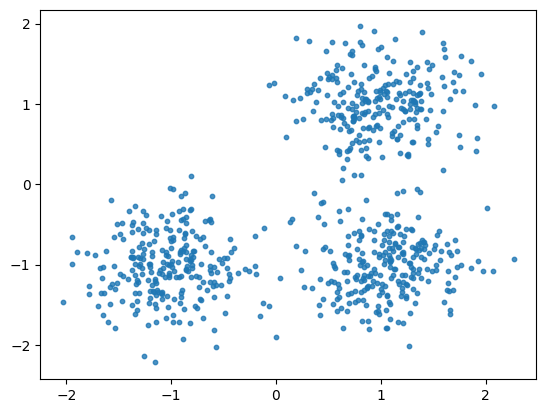

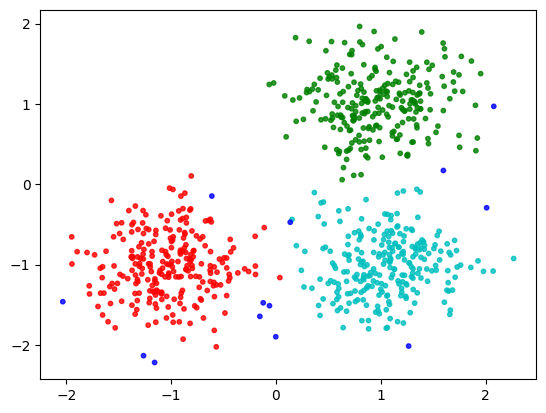

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [0 for _ in range(len(self.dataset))]

    def is_core(self, i):
        neighbors = []
        for j in range(len(self.dataset)):
            if i != j and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return len(neighbors) >= self.min_pts

    def get_unlabeled_neighbors(self, i):
        neighbors = []
        for j in range(len(self.dataset)):
            if i != j and self.assignments[j] == 0 and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return neighbors

    def dfs_assign(self, i, cluster_num):
        self.assignments[i] = cluster_num
        neighbors = self.get_unlabeled_neighbors(i) #this should return a list of indexes
        while neighbors:
            next_candidate = neighbors.pop()
            if self.assignments[next_candidate] != 0:
                continue
            self.assignments[next_candidate] = cluster_num
            if self.is_core(next_candidate):
                neighbors += self.get_unlabeled_neighbors(next_candidate)
        return

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        
        cluster_num = 1
        for i in range(len(self.dataset)):
            if self.assignments[i] != 0:
                continue
            if self.is_core(i):
                self.dfs_assign(i, cluster_num)
            cluster_num += 1
        return self.assignments

clustering = DBC(X, 3, .2556).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()